In [ ]:
# Függvényábrázolás:

In [1]:
# Ábrázolja az y1=sin(x)/x és az y2=cos(x)/x függvényeket a [-5π,5π] intervallumban 100-s osztópontokal.

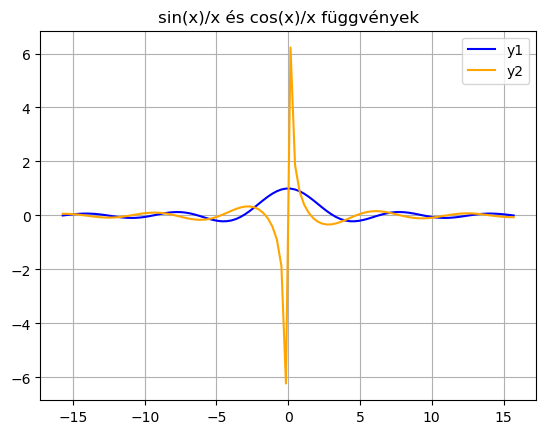

In [5]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
x = np.linspace(-5*np.pi,5*np.pi,100)
y1 = np.where(x != 0, np.sin(x) / x, 1)
y2 = np.where(x != 0, np.cos(x) / x, 1)
plt.plot(x,y1,'b')
plt.plot(x,y2,'orange')
plt.legend(['y1','y2'])
plt.title('sin(x)/x és cos(x)/x függvények')
plt.grid(True)
plt.show()

In [6]:
#Idősor ábrázolás:

In [7]:
# Hívja be az airline_passangers.csv fájlt. Ebben a fájlban 1949 és 1960 között (havi bontásban) megtalálja,
# hogy hány ezer fő utazott adott hónapban a világ repülőgép járatain.

In [12]:
import pandas as pd
df = pd.read_csv('airline_passengers.csv',encoding="ISO-8859-2")
print(df)

       Month  Thousands of Passengers
0    1949-01                      112
1    1949-02                      118
2    1949-03                      132
3    1949-04                      129
4    1949-05                      121
..       ...                      ...
139  1960-08                      606
140  1960-09                      508
141  1960-10                      461
142  1960-11                      390
143  1960-12                      432

[144 rows x 2 columns]


In [13]:
# Ábrázolja az utasforgalmat, ahogy a képen látja.

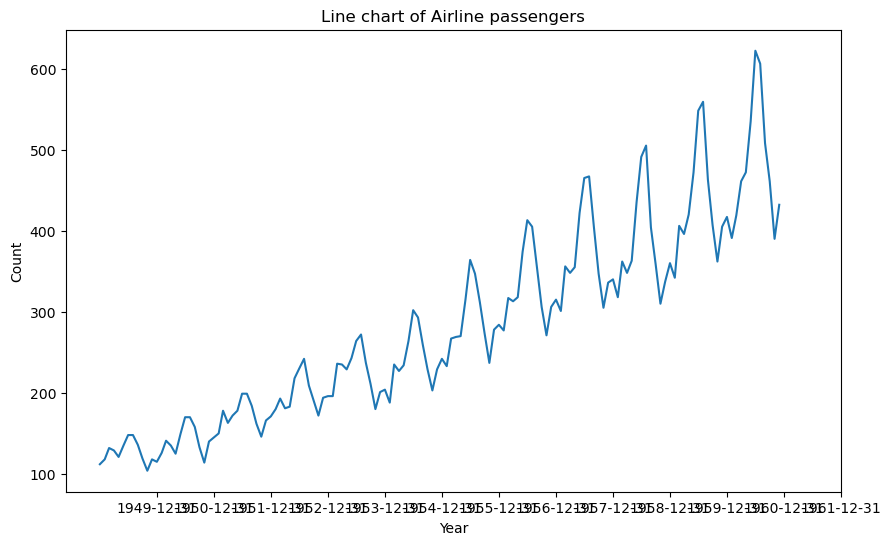

In [14]:
df['Month'] = pd.to_datetime(df['Month'])
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Thousands of Passengers'], linestyle='-')
plt.title('Line chart of Airline passengers')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(pd.date_range('1949-01-01', '1962-01-01', freq='Y'))
plt.yticks(range(100, 700, 100))
plt.grid(False)
plt.show()

In [15]:
# Dataframe feladatok:

In [16]:
# 1.feladat: Hívja be az Ertekesites (nagyker) Excel munkafüzet Lekérdezés1 tábláját.

In [17]:
df1 =pd.read_excel('Ertekesites(nagyker).xlsx', sheet_name='Lekérdezés1')
df1

,Dátum,Kategórianév,Terméknév,Mennyiség,Bevétel,Költség,Nyereség,Vevőnév,Vevő megye,Vevő város,Bolt megye,Bolt város,Boltnév
0,2015-01-02,Iroda,Toll,800,320000,256000.0,64000.0,Kovács Bt,Pest,Gödöllő,Heves,Eger,2. ABC
1,2015-01-05,Iroda,Toll,800,320000,204800.0,115200.0,Kovács Bt,Pest,Gödöllő,Heves,Eger,2. ABC
2,2015-01-13,Játék,Labda,600,300000,240000.0,60000.0,Kovács Bt,Pest,Gödöllő,Heves,Gyöngyös,1. ABC
3,2015-01-16,Játék,Labda,600,300000,192000.0,108000.0,Kovács Bt,Pest,Gödöllő,Heves,Gyöngyös,1. ABC
4,2015-01-23,Játék,Labda,300,150000,120000.0,30000.0,Nagy Kft,Heves,Gyöngyös,Heves,Gyöngyös,1. ABC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2016-12-17,Kert,Kapa,1000,800000,640000.0,160000.0,Kovács Bt,Pest,Gödöllő,Heves,Gyöngyös,1. ABC
302,2016-12-17,Kert,Kapa,1000,800000,640000.0,160000.0,Kis Bt,Heves,Hatvan,Heves,Gyöngyös,1. ABC
303,2016-12-19,Játék,Labda,900,450000,360000.0,90000.0,Kovács Bt,Pest,Gödöllő,Heves,Eger,1. ABC
304,2016-12-20,Iroda,Ceruza,1500,450000,360000.0,90000.0,Kis Bt,Heves,Hatvan,Heves,Gyöngyös,1. ABC


In [18]:
# 2.feladat: Számítsa ki a Bolt városok Nyereségének átlagát, majd ábrázolja egy zöld sávdiagramon.

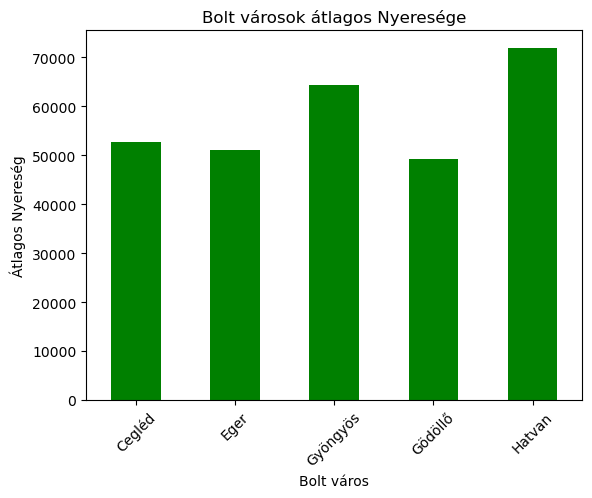

In [19]:
atlag= df1.groupby('Bolt város')['Nyereség'].mean()
atlag.plot(kind='bar', color='green')
plt.title('Bolt városok átlagos Nyeresége')
plt.xlabel('Bolt város')
plt.ylabel('Átlagos Nyereség')
plt.xticks(rotation=45)
plt.show()

In [20]:
# 3.feladat: Számolja ki, hogy az egyes vevőknek hány vásárlása volt és ezen belül milyen a kategóriák megoszlása.
# Ezt ábrázolja egy csoportosított oszlopdiagramon.

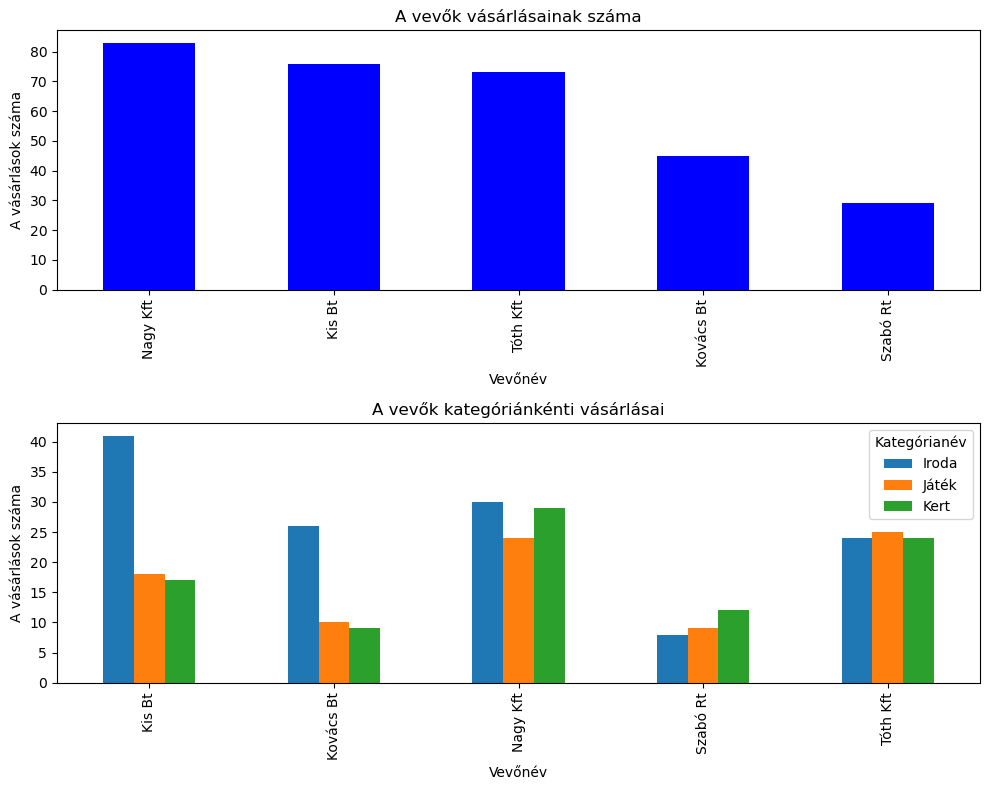

In [23]:
vasarlas = df1['Vevőnév'].value_counts()
kat = df1.groupby(['Vevőnév', 'Kategórianév']).size().unstack(fill_value=0)
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
vasarlas.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('A vevők vásárlásainak száma')
axes[0].set_ylabel('A vásárlások száma')
kat.plot(kind='bar', ax=axes[1])
axes[1].set_title('A vevők kategóriánkénti vásárlásai')
axes[1].set_ylabel('A vásárlások száma')
plt.tight_layout()
plt.show()

In [24]:
# 4.feladat: Hozzon létre egy eltelt_napok oszlopot, amiben kiszámolja, hogy az utolsó vásárlás óta hány nap telt el.

In [25]:
import datetime as dt
df1['Dátum'] = pd.to_datetime(df1['Dátum'])
utolso = df1['Dátum'].max()
df1['eltelt_napok'] = (utolso - df1['Dátum']).dt.days
print(df1[['Dátum', 'eltelt_napok']])

         Dátum  eltelt_napok
0   2015-01-02           726
1   2015-01-05           723
2   2015-01-13           715
3   2015-01-16           712
4   2015-01-23           705
..         ...           ...
301 2016-12-17            11
302 2016-12-17            11
303 2016-12-19             9
304 2016-12-20             8
305 2016-12-28             0

[306 rows x 2 columns]


In [26]:
# 5.feladat: Gyűjtse össze, hogy a hét egyes napjain mennyi volt a Bevétel. Készítsen ebből egy kördiagramot,
# amin % os formában láthatjuk, hogy az egyes napok az egész hétnek mekkora részét teszik ki.

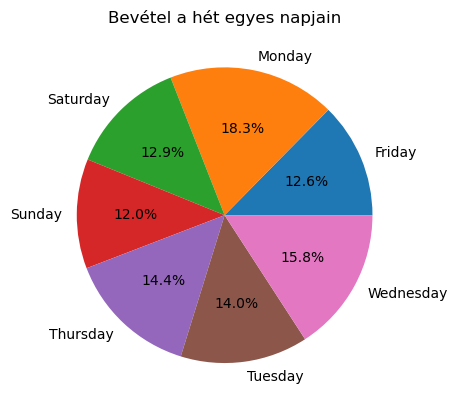

In [28]:
nap = df1.groupby(df1['Dátum'].dt.day_name())['Bevétel'].sum()
bevetel = nap / nap.sum() * 100
bevetel.plot(kind='pie', autopct='%1.1f%%')
plt.title('Bevétel a hét egyes napjain')
plt.ylabel('')
plt.show()

In [29]:
# 6.feladat: Hozzon létre egy dataframe-t, amelynek 30 sora és 2 oszlopa van. 
# Az első oszlop 100 és 200 , a második 120 és 180 közötti véletlen számokból álljon.
# A dataframe-hez rendelje a 2019 szeptemberi napjait. Ábrázolja az adatokat egy piros és zöld vonaldiagramon.

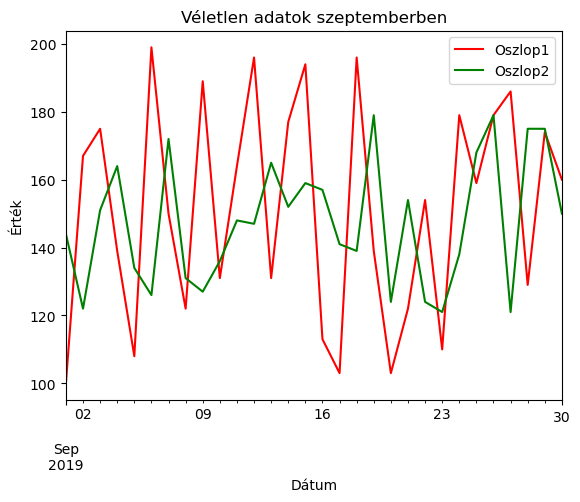

In [30]:
datum = pd.date_range(start='2019-09-01', end='2019-09-30')
data = {
'Oszlop1': np.random.randint(100, 201, size=len(datum)),
'Oszlop2': np.random.randint(120, 181, size=len(datum))
}
dataframe = pd.DataFrame(data, index=datum)
dataframe.plot(color=['red', 'green'])
plt.title('Véletlen adatok szeptemberben')
plt.xlabel('Dátum')
plt.ylabel('Érték')
plt.show()